In [1]:
#All the necessary libraries are imported here

import numpy as np
import pandas as pd
import json
import spacy
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from imblearn.over_sampling import SMOTE


from wordcloud import wordcloud
import html
from html.parser import HTMLParser
    
import seaborn as sns
import string
import plotly.express as px 
import numpy as np
import pandas as pd 
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
import nltk
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from millify     import millify
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import pickle
import re

In [2]:
#Importing the JSON file as mydata

with open('CETM47-22_23-AS2-Data.json') as file:
    mydata = json.load(file)

In [3]:
print(mydata)

[{'text': 'The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard', 'date': '2019-09-08', 'label': 4, 'id': 1170516324419866624, 'label_name': 'sports_&_gaming'}, {'text': 'I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@}', 'date': '2019-09-08', 'label': 4, 'id': 1170516440690176006, 'label_name': 'sports_&_gaming'}, {'text': 'Someone take my phone away, I’m trying to not look at {@Chicago Blackhawks@} home game tickets in October ', 'date': '2019-09-08', 'label': 4, 'id': 1170516543387709440, 'label_name': 'sports_&_gaming'}, {'text': 'A year ago, Louisville struggled to beat an FCS opponent, ISU.  Yes they won 31-7, but score wasn’t indicative of the game flow.  Today, they are demoralizing a better FCS opponent in EKU. {@Coach Satterfield@} thank you!! {{USERNAME}} , glad you’re gone.', 'date':

In [4]:
#########Data Exploration and Pre-processing############

In [5]:
#Checking the number of tweets or entries in the dataset
number_of_tweets = len(mydata)
print("Number of tweets in my dataset:", number_of_tweets)

Number of tweets in my dataset: 6443


In [6]:
#There are 6443 tweet entries
#This goes with the information provided in the assignment details. 

In [7]:
#Finding all the labels in the dataset

label_names = set(tweets['label_name'] for tweets in mydata)

print("label_names:")
for label_names in label_names:
    print(label_names)

label_names:
arts_&_culture
sports_&_gaming
daily_life
pop_culture
business_&_entrepreneurs
science_&_technology


In [8]:
#There are 6 unique labels in the dataset

In [9]:
#Checking if there are any duplicate tweets in the dataset based on "id"

ids = set()
duplicate_count = 0

for tweet in mydata:
    tweet_id = tweet['id']
    
    if tweet_id in ids:
        duplicate_count += 1
    else:
        ids.add(tweet_id)

# Printing the result
print("Count of duplicate tweets:", duplicate_count)


Count of duplicate tweets: 0


In [10]:
#We can see that there are no duplicate tweets in the dataset based on "id"

In [11]:
#However, let us check if there are any duplicate based on the text. It is possible that users copy and paste other tweets

In [12]:
texts = set()
duplicate_text = 0

for tweet in mydata:
    tweet_text = tweet['text'].strip()  # Strip leading and trailing whitespaces
    
    if tweet_text in texts:
        duplicate_text += 1
    else:
        texts.add(tweet_text)
        
print("Count of duplicates based on text:", duplicate_text)

    

Count of duplicates based on text: 1


In [13]:
#Since we can see that there is 1 duplicate tweet based on the "text"
#Finding the text which is duplicate

texts = set()
duplicate_texts = []

for tweet in mydata:
    tweet_text = tweet['text']
    
    if tweet_text in texts:
        if tweet_text not in duplicate_texts:
            duplicate_texts.append(tweet_text)
    else:
        texts.add(tweet_text)

print("Duplicate texts:")
for text in duplicate_texts:
    print(text)



Duplicate texts:
I just earned the  The Dark Side (Level 2)  badge on {{USERNAME}} ! {{URL}}


In [14]:
#Creating new dataset without the duplicate text
unique_texts = []

new_data = []
for tweet in mydata:
    tweet_text = tweet['text']
    if tweet_text not in unique_texts:
        unique_texts.append(tweet_text)
        new_data.append(tweet)

# Print the number of unique tweets
print("Number of unique tweets:", len(new_data))

#converting them to a new dataframe

#new dataset is created without the duplicate tweet

new_data2 = pd.DataFrame(new_data)



Number of unique tweets: 6442


In [15]:
#There are now 6442 entries in the new_data

In [16]:
#Different data exploration and visualization

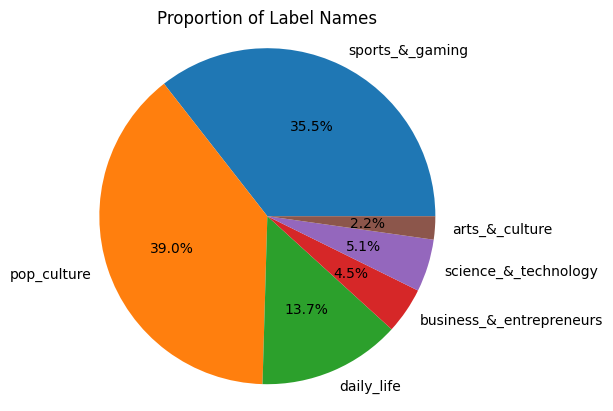

In [17]:
#Creating a Pie chart to see the distribution of the dataset based on labels. 

# Create a dictionary to store the label counts
label_counts = {}

# Count the occurrences of each label name
for tweet in new_data:
    label_name = tweet['label_name']
    if label_name in label_counts:
        label_counts[label_name] += 1
    else:
        label_counts[label_name] = 1

# Extract the label names and their corresponding counts
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Create the pie chart
plt.pie(counts, labels=labels,autopct = '%1.1f%%')
plt.title('Proportion of Label Names')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()


In [18]:
#checking if there are any missing values

if new_data2.isnull().values.any():
    print("There are missing values in the Data.")
else:
    print("No missing values found in the Data.")


No missing values found in the Data.


In [19]:
#Hence, there are no missing values here

In [20]:
#Checking the number of words in the text

word_count = new_data2['text'].str.split().apply(len).sum()
print("Total number of words in the 'text' column:", word_count)

# Count the number of entries in the 'text' column
entry_count = len(new_data2['text'])
print("Total number of entries in the 'text' column:", entry_count)


Total number of words in the 'text' column: 178337
Total number of entries in the 'text' column: 6442


In [21]:
#in 6442 entries, there are 178337 words
#This can be used to compare the dataset after the pre-processing

In [22]:
#There are several steps that can be taken to pre-process this dataset. 
#We can see that there are usernames with @username mentioned in the tweet, we can remove all these usernames
#We can remove all special characters from the tweet
#We can remove all the smileys or emoticons from the tweets
#We can remove any word which is at length 1
#We can remove the Stopwords that are not important

In [23]:
#The tweets in the text is pre-processed using different methods. These preprocessed texts can be stored in a separate column

# Creating a new column for the cleaned text after preprocessing

#using pandas, we can use apply method for this

new_data2['cleaned_text'] = new_data2['text'].apply(lambda x: html.unescape(x))


In [24]:
new_data2.head(10)

text        date  label   
0  The {@Clinton LumberKings@} beat the {@Cedar R...  2019-09-08      4  \
1  I would rather hear Eli Gold announce this Aub...  2019-09-08      4   
2  Someone take my phone away, I’m trying to not ...  2019-09-08      4   
3  A year ago, Louisville struggled to beat an FC...  2019-09-08      4   
4  Anyone know why the #Dodgers #Orioles game nex...  2019-09-08      4   
5  I don’t care. you gave him a shot, he is strug...  2019-09-08      4   
6  Okay how can I watch the {@Arkansas State Foot...  2019-09-08      4   
7  Check out largest crowds ever for a basketball...  2019-09-08      4   
8  I voted #WeWantNCAAFootball on {{USERNAME}} . ...  2019-09-08      4   
9  Streaming a new game #minionmasters come stop ...  2019-09-08      4   

                    id       label_name   
0  1170516324419866624  sports_&_gaming  \
1  1170516440690176006  sports_&_gaming   
2  1170516543387709440  sports_&_gaming   
3  1170516620466429953  sports_&_gaming   
4  1170516711411310592  sports_&_gaming   
5  1170516891053580288  sports_&_gaming   
6  1170516916554936322  sports_&_gaming   
7  1170516940902805504  sports_&_gaming   
8  1170517092489187328  sports_&_gaming   
9  1170546366566846464  sports_&_gaming   

                                        cleaned_text  
0  The {@Clinton LumberKings@} beat the {@Cedar R...  
1  I would rather hear Eli Gold announce this Aub...  
2  Someone take my phone away, I’m trying to not ...  
3  A year ago, Louisville struggled to beat an FC...  
4  Anyone know why the #Dodgers #Orioles game nex...  
5  I don’t care. you gave him a shot, he is strug...  
6  Okay how can I watch the {@Arkansas State Foot...  
7  Check out largest crowds ever for a basketball...  
8  I voted #WeWantNCAAFootball on {{USERNAME}} . ...  
9  Streaming a new game #minionmasters come stop ...

In [25]:
#Lets remove all the mentions of #users (such as @username ) from the tweet and store them in the 'cleaned_text'

#We can use Pandas, str.replace method for this

new_data2['cleaned_text'] = new_data2['cleaned_text'].str.replace(r'@\w+', '', regex=True)
#new_data2.head(10)

In [26]:
#removing the #special_characters from the text. This will be reflected in the "cleaned_text" column

new_data2['cleaned_text'] = new_data2['cleaned_text'].str.replace(r'[{}[\]()?<>!"£$%^&*\\//@]', '', regex=True)
#new_data2.head(10)

In [27]:
#From exploring the dataset, we have seen that there are many "URL" and "USERNAME" in the text, we can remove those using the same str.replace in regex

new_data2['cleaned_text'] = new_data2['cleaned_text'].str.replace(r'\b(?:URL|USERNAME)\b', '', regex=True)
#new_data2.head(10)

In [28]:
#Now can change all the text to #lower_case. This is better for the model
#There are several reasons to convert the words to lower case such as Normalization, word embedding etc. 


new_data2['cleaned_text'] = new_data2['cleaned_text'].apply(lambda x: x.lower())
#new_data2.head(10)

In [29]:
# word_counts = new_data2['text'].str.split().apply(len).sum()
# print("Total number of words in the 'text' column:", word_counts)

# word_count = new_data2['cleaned_text'].str.split().apply(len).sum()
# print("Total number of words in the 'cleaned_text' column:", word_count)


In [30]:
#Creating a dictionary for the emoticons
#this dictionary will be used to replace any emojis in the text

#reference: https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py


Emoji_dic = {
    u":‑)":"Happy face or smiley",
    u":-))":"Very Happy face or smiley",
    u":-)))":"Very very Happy face or smiley",
    u":)":"Happy face or smiley",
    u":))":"Very Happy face or smiley",
    u":)))":"Very very Happy face or smiley",
    u":-]":"Happy face or smiley",
    u":]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-)":"Happy face smiley",
    u":o)":"Happy face smiley",
    u":-}":"Happy face smiley",
    u":}":"Happy face smiley",
    u":-)":"Happy face smiley",
    u":c)":"Happy face smiley",
    u":^)":"Happy face smiley",
    u"=]":"Happy face smiley",
    u"=)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B^D":"Laughing, big grin or laugh with glasses",
    u":-))":"Very happy",
    u":-(":"Frown, sad, angry or pouting",
    u":‑(":"Frown, sad, angry or pouting",
    u":(":"Frown, sad, angry or pouting",
    u":‑c":"Frown, sad, angry or pouting",
    u":c":"Frown, sad, angry or pouting",
    u":‑<":"Frown, sad, angry or pouting",
    u":<":"Frown, sad, angry or pouting",
    u":‑[":"Frown, sad, angry or pouting",
    u":[":"Frown, sad, angry or pouting",
    u":-||":"Frown, sad, angry or pouting",
    u">:[":"Frown, sad, angry or pouting",
    u":{":"Frown, sad, angry or pouting",
    u":@":"Frown, sad, angry or pouting",
    u">:(":"Frown, sad, angry or pouting",
    u":'‑(":"Crying",
    u":'(":"Crying",
    u":'‑)":"Tears of happiness",
    u":')":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-*":"Kiss",
    u":*":"Kiss",
    u":X":"Kiss",
    u";‑)":"Wink or smirk",
    u";)":"Wink or smirk",
    u"*-)":"Wink or smirk",
    u"*)":"Wink or smirk",
    u";‑]":"Wink or smirk",
    u";]":"Wink or smirk",
    u";^)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑|":"Straight face",
    u":|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑)":"Angel, saint or innocent",
    u"O:)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑)":"Angel, saint or innocent",
    u"0:)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;^)":"Angel, saint or innocent",
    u">:‑)":"Evil or devilish",
    u">:)":"Evil or devilish",
    u"}:‑)":"Evil or devilish",
    u"}:)":"Evil or devilish",
    u"3:‑)":"Evil or devilish",
    u"3:)":"Evil or devilish",
    u">;)":"Evil or devilish",
    u"|;‑)":"Cool",
    u"|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑)":"Party all night",
    u"%‑)":"Drunk or confused",
    u"%)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑|":"Dump",
    u"(>_<)":"Troubled",
    u"(>_<)>":"Troubled",
    u"(';')":"Baby",
    u"(^^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(^_^;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(~_~;) (・.・;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-)zzz":"Sleeping",
    u"(^_-)":"Wink",
    u"((+_+))":"Confused",
    u"(+o+)":"Confused",
    u"(o|o)":"Ultraman",
    u"^_^":"Joyful",
    u"(^_^)/":"Joyful",
    u"(^O^)／":"Joyful",
    u"(^o^)／":"Joyful",
    u"(__)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_(._.)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<(_ _)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m(__)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(__)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(_ _)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"('_')":"Sad or Crying",
    u"(/_;)":"Sad or Crying",
    u"(T_T) (;_;)":"Sad or Crying",
    u"(;_;":"Sad of Crying",
    u"(;_:)":"Sad or Crying",
    u"(;O;)":"Sad or Crying",
    u"(:_;)":"Sad or Crying",
    u"(ToT)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q.Q":"Sad or Crying",
    u"T.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"(-.-)":"Shame",
    u"(-_-)":"Shame",
    u"(一一)":"Shame",
    u"(；一_一)":"Shame",
    u"(=_=)":"Tired",
    u"(=^·^=)":"cat",
    u"(=^··^=)":"cat",
    u"=_^= ":"cat",
    u"(..)":"Looking down",
    u"(._.)":"Looking down",
    u"^m^":"Giggling with hand covering mouth",
    u"(・・?":"Confusion",
    u"(?_?)":"Confusion",
    u">^_^<":"Normal Laugh",
    u"<^!^>":"Normal Laugh",
    u"^/^":"Normal Laugh",
    u"（*^_^*）" :"Normal Laugh",
    u"(^<^) (^.^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^.^)":"Normal Laugh",
    u"(^_^.)":"Normal Laugh",
    u"(^_^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^J^)":"Normal Laugh",
    u"(*^.^*)":"Normal Laugh",
    u"(^—^）":"Normal Laugh",
    u"(#^.^#)":"Normal Laugh",
    u"（^—^）":"Waving",
    u"(;_;)/~~~":"Waving",
    u"(^.^)/~~~":"Waving",
    u"(-_-)/~~~ ($··)/~~~":"Waving",
    u"(T_T)/~~~":"Waving",
    u"(ToT)/~~~":"Waving",
    u"(*^0^*)":"Excited",
    u"(*_*)":"Amazed",
    u"(*_*;":"Amazed",
    u"(+_+) (@_@)":"Amazed",
    u"(*^^)v":"Laughing,Cheerful",
    u"(^_^)v":"Laughing,Cheerful",
    u"((d[-_-]b))":"Headphones,Listening to music",
    u'(-"-)':"Worried",
    u"(ーー;)":"Worried",
    u"(^0_0^)":"Eyeglasses",
    u"(＾ｖ＾)":"Happy",
    u"(＾ｕ＾)":"Happy",
    u"(^)o(^)":"Happy",
    u"(^O^)":"Happy",
    u"(^o^)":"Happy",
    u")^o^(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o.O":"Surpised",
    u"(o.o)":"Surprised",
    u"oO":"Surprised",
    u"(*￣m￣)":"Dissatisfied",
    u"(‘A`)":"Snubbed or Deflated"

}

In [31]:
#Replacing all the emojis in the cleaned_text with words using the dictionary defined above

#We can use lookup_dict for this. It will find the relevant text and replace it based on the dictionary defined above.

def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

new_data2['cleaned_text'] = new_data2['cleaned_text'].apply(lambda x: lookup_dict(x,Emoji_dic))
#new_data2.head(10)

In [32]:
#It is common to use apostrophe in the words instead of using the entire word while tweeting. 
#This can be converted to proper word which will be benefical for the NLP model.
#Using spaCy library, we can convert all the apostraphe words to proper words. 

#A new function is created and then applied to the dataframe for the column "cleaned_text"
#reference: https://spacy.io

#Loading the english language model 'en_core_web_sm'

nlp = spacy.load('en_core_web_sm')

# Function to convert apostrophe words to proper words

def convert_apostrophe_words(text):
    doc = nlp(text)
    converted_text = ' '.join([token.lemma_ if token.lemma_ != "-PRON-" else token.text for token in doc])
    return converted_text

# Apply the conversion to the "cleaned_text" column in the dataset

new_data2['cleaned_text'] = new_data2['cleaned_text'].apply(convert_apostrophe_words)

# Display the updated dataset
#new_data2.head(10)

In [33]:
# word_counts = new_data2['text'].str.split().apply(len).sum()
# print("Total number of words in the 'text' column:", word_counts)

# word_count = new_data2['cleaned_text'].str.split().apply(len).sum()
# print("Total number of words in the 'cleaned_text' column:", word_count)


In [34]:
new_data2['cleaned_text'].head(10)

0    the   lumberking beat the   rapid kernel 4 - 0...
1    I would rather hear eli gold announce this aub...
2    someone take my phone away , I ’m try to not l...
3    a year ago , louisville struggle to beat an fc...
4    anyone know why the # dodger # oriole game nex...
5    I do not care . you give he a shot , he be str...
6    okay how can I watch the   state football and ...
7    check out large crowd ever for a basketball ga...
8    I vote # wewantncaafootball on   . it ’ the go...
9    stream a new game # minionmaster come stop by ...
Name: cleaned_text, dtype: object

In [35]:
#Making sure if all the special characters are removed. 

characters_to_check = r'!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~'
pattern = '[' + re.escape(characters_to_check) + ']'


new_data2['cleaned_text'] = new_data2['cleaned_text'].str.replace(pattern, '', regex=True)


In [36]:
#We can see that there are many instances of \u followed by numbers or characters. We can use regex to remove these

In [37]:
new_data2['cleaned_text'] = new_data2['cleaned_text'].str.replace(r'\\u\w{4}', '', regex=True)

#new_data2.head(10)

In [38]:
#We can remove the Stop Words now. 
#For this we can use the dictionary from NLTK
#nltk.download('stopwords')

In [39]:
#Defining the dictionary from the library. This will download the stopwords from English language

stopword = set(stopwords.words('english'))

In [40]:
new_data2['cleaned_text'] = new_data2['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopword]))


In [41]:

# #Lets Tokenize the Text
# #Necessary libraries are already imported
# #The tokenized text are stored on another column

new_data2['tok_text'] = new_data2['cleaned_text'].apply(lambda x: word_tokenize(x))

In [42]:
new_data2.head(10)

text        date  label   
0  The {@Clinton LumberKings@} beat the {@Cedar R...  2019-09-08      4  \
1  I would rather hear Eli Gold announce this Aub...  2019-09-08      4   
2  Someone take my phone away, I’m trying to not ...  2019-09-08      4   
3  A year ago, Louisville struggled to beat an FC...  2019-09-08      4   
4  Anyone know why the #Dodgers #Orioles game nex...  2019-09-08      4   
5  I don’t care. you gave him a shot, he is strug...  2019-09-08      4   
6  Okay how can I watch the {@Arkansas State Foot...  2019-09-08      4   
7  Check out largest crowds ever for a basketball...  2019-09-08      4   
8  I voted #WeWantNCAAFootball on {{USERNAME}} . ...  2019-09-08      4   
9  Streaming a new game #minionmasters come stop ...  2019-09-08      4   

                    id       label_name   
0  1170516324419866624  sports_&_gaming  \
1  1170516440690176006  sports_&_gaming   
2  1170516543387709440  sports_&_gaming   
3  1170516620466429953  sports_&_gaming   
4  1170516711411310592  sports_&_gaming   
5  1170516891053580288  sports_&_gaming   
6  1170516916554936322  sports_&_gaming   
7  1170516940902805504  sports_&_gaming   
8  1170517092489187328  sports_&_gaming   
9  1170546366566846464  sports_&_gaming   

                                        cleaned_text   
0  lumberking beat rapid kernel 4 0 game 1 wester...  \
1  I would rather hear eli gold announce auburn g...   
2  someone take phone away I ’m try look blackhaw...   
3  year ago louisville struggle beat fcs opponent...   
4  anyone know dodger oriole game next thursday 9...   
5  I care give shot struggle put joey see offer g...   
6           okay I watch state football unlv game fb   
7  check large crowd ever basketball game phil ar...   
8        I vote wewantncaafootball ’ good video game   
9  stream new game minionmaster come stop join I ...   

                                            tok_text  
0  [lumberking, beat, rapid, kernel, 4, 0, game, ...  
1  [I, would, rather, hear, eli, gold, announce, ...  
2  [someone, take, phone, away, I, ’, m, try, loo...  
3  [year, ago, louisville, struggle, beat, fcs, o...  
4  [anyone, know, dodger, oriole, game, next, thu...  
5  [I, care, give, shot, struggle, put, joey, see...  
6  [okay, I, watch, state, football, unlv, game, fb]  
7  [check, large, crowd, ever, basketball, game, ...  
8  [I, vote, wewantncaafootball, ’, good, video, ...  
9  [stream, new, game, minionmaster, come, stop, ...

In [43]:
#I can now do Lemmatization or Stemming
#Based on my research, I am following the Lemmanization method as I find it suitable for the end-result

In [44]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\reshm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
#Lemmatization is done and a new column is created

lemmatizing = WordNetLemmatizer()

new_data2['lemm_text'] = new_data2['tok_text'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
new_data2['lemm_text'].head(10)

0    lumberking beat rapid kernel 4 0 game 1 wester...
1    I would rather hear eli gold announce auburn g...
2    someone take phone away I ’ m try look blackha...
3    year ago louisville struggle beat fcs opponent...
4    anyone know dodger oriole game next thursday 9...
5    I care give shot struggle put joey see offer g...
6             okay I watch state football unlv game fb
7    check large crowd ever basketball game phil ar...
8          I vote wewantncaafootball ’ good video game
9    stream new game minionmaster come stop join I ...
Name: lemm_text, dtype: object

In [46]:
#The text are all pre-processed 
#We have removed unwanted noises from the text like special characters, username etc
#Checked and removed duplicate text from the dataset
#Converted all the text to lowecase
#We have converted the emoticons to its representation in words
#Used SpaCy to convert Appostraphe words into proper words
#We have removed all the stopwords using NLTK
#We have Tokenized the text
#We have Lemmatized the text

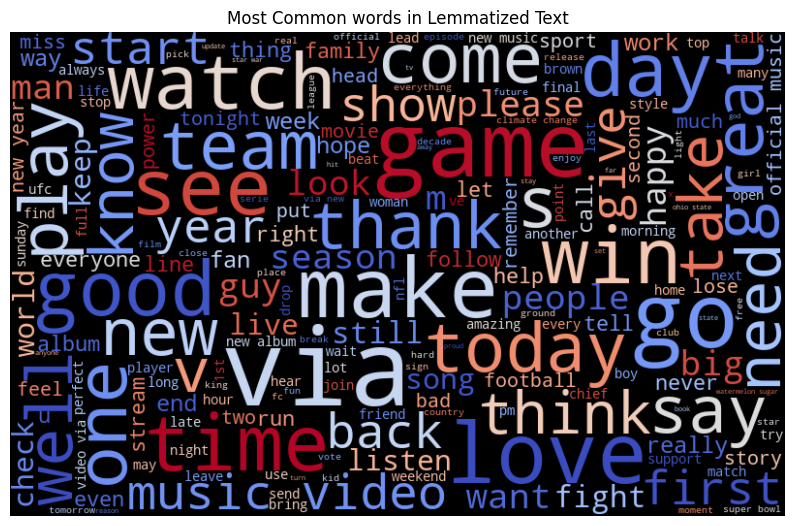

In [47]:
#We can visualize the words in the Lemmatized Text

all_words = ' '.join([text for text in new_data2['lemm_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='black', colormap='coolwarm').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in Lemmatized Text")
plt.show()

In [48]:
#Lets visualize the common words in each category using the label names

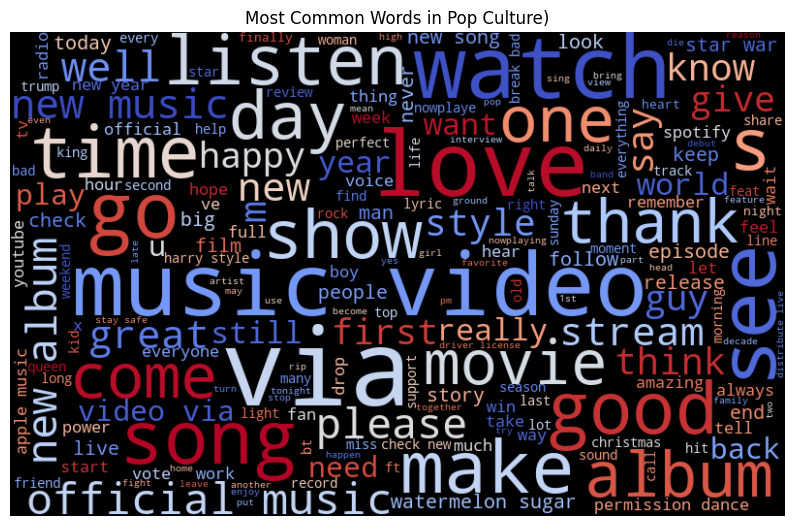

In [49]:
pop_culture_words = ' '.join([text for text in new_data2[new_data2['label_name'] == 'pop_culture']['lemm_text']])
wordpop = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='black', colormap='coolwarm').generate(pop_culture_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordpop, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in Pop Culture)")
plt.show()

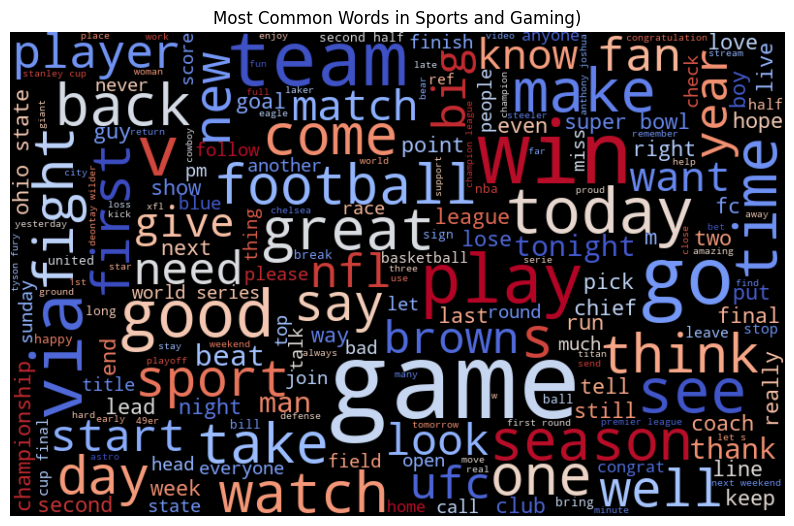

In [50]:
#Lets visualize most common words in Sports and gaming

sports_gaming_words = ' '.join([text for text in new_data2[new_data2['label_name'] == 'sports_&_gaming']['lemm_text']])
wordsports = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='black', colormap='coolwarm').generate(sports_gaming_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordsports, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in Sports and Gaming)")
plt.show()

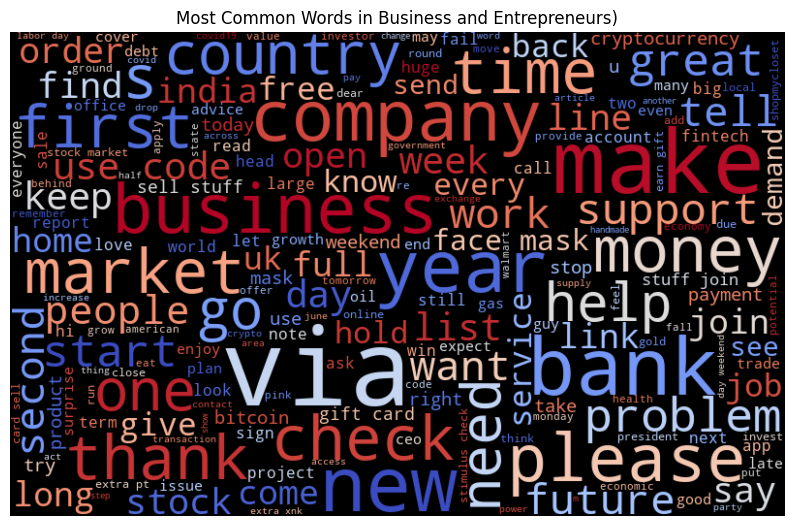

In [51]:
#Visualizing the common words in business and entrepreneurs

business_entrepreneurs_words = ' '.join([text for text in new_data2[new_data2['label_name'] == 'business_&_entrepreneurs']['lemm_text']])
wordsbusiness = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='black', colormap='coolwarm').generate(business_entrepreneurs_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordsbusiness, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in Business and Entrepreneurs)")
plt.show()

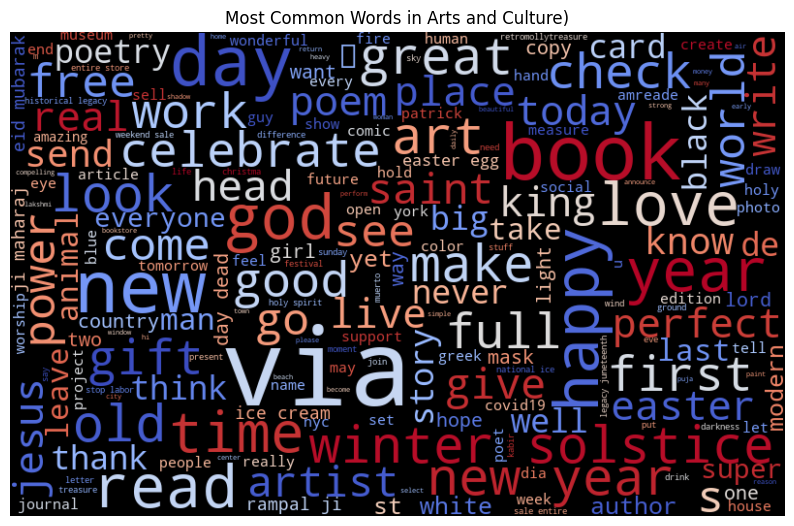

In [52]:
#Visualizing the common words in arts_&_culture

arts_words = ' '.join([text for text in new_data2[new_data2['label_name'] == 'arts_&_culture']['lemm_text']])
wordsart = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='black', colormap='coolwarm').generate(arts_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordsart, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in Arts and Culture)")
plt.show()


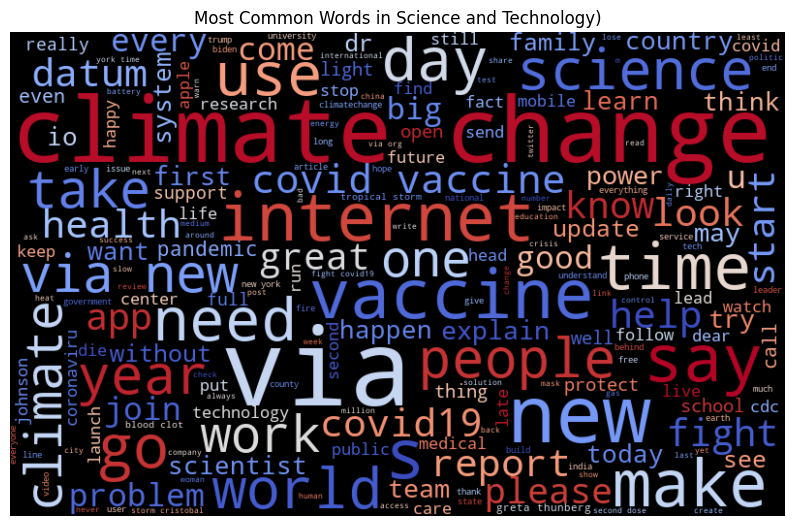

In [53]:
#Visualizing the common words in science_&_technology

science_words = ' '.join([text for text in new_data2[new_data2['label_name'] == 'science_&_technology']['lemm_text']])
wordstech = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='black', colormap='coolwarm').generate(science_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordstech, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in Science and Technology)")
plt.show()

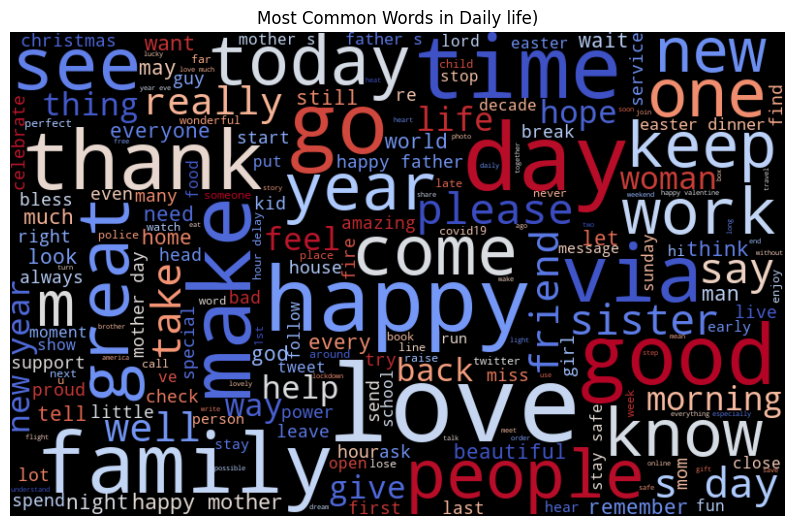

In [54]:
#Visualizing common words under the category of daily_life

daily_words = ' '.join([text for text in new_data2[new_data2['label_name'] == 'daily_life']['lemm_text']])
wordsdaily = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='black', colormap='coolwarm').generate(daily_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordsdaily, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common Words in Daily life)")
plt.show()

In [55]:
# #Downloading all the positive and Negative words from NLTK

# #Positive words in the dictionary can be found here: https://gist.github.com/mkulakowski2/4289437
# #Negative words in the dic can be found here: https://gist.github.com/mkulakowski2/4289441

# #nltk.download('opinion_lexicon') 
# positive_words = set(opinion_lexicon.positive())
# negative_words = set(opinion_lexicon.negative())

In [56]:
#We have to do the following next
#Feature Extraction using Multiple Models
#ML models using Multiple methods

In [57]:
#Using BoW method, we are extraction features

#from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

bow_count = count_vect.fit_transform(new_data2['lemm_text'])


In [58]:
#from sklearn.preprocessing import StandardScaler

In [59]:
#Scaling

bow_scale = StandardScaler(with_mean=False).fit_transform(bow_count)
bow_scale

<6442x17986 sparse matrix of type '<class 'numpy.float64'>'
	with 91030 stored elements in Compressed Sparse Row format>

In [60]:
#Splitting the data for features extracted using BoW


In [61]:
X = bow_scale
Y = new_data2['label_name']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, stratify=Y, random_state=42)

In [62]:
print("Unique labels in train set:", np.unique(Y_train))
print("Unique labels in test set:", np.unique(Y_test))

Unique labels in train set: ['arts_&_culture' 'business_&_entrepreneurs' 'daily_life' 'pop_culture'
 'science_&_technology' 'sports_&_gaming']
Unique labels in test set: ['arts_&_culture' 'business_&_entrepreneurs' 'daily_life' 'pop_culture'
 'science_&_technology' 'sports_&_gaming']


In [63]:
X_train.shape, X_test.shape

((4509, 17986), (1933, 17986))

In [64]:
Y_train.shape, Y_test.shape

((4509,), (1933,))

In [65]:
#Y_test = Y_test.values

In [66]:
#Experimenting on Models

In [67]:
IGClassifier=DecisionTreeClassifier(criterion='entropy',max_depth=5)
IGClassifier.fit(X_train,Y_train)
IGClassifier

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [68]:
bow_test =IGClassifier.predict(X_test)
#predictions
len(bow_test)

1933

In [69]:
predBow = pd.DataFrame({'Actual' : Y_test.values.ravel(), 'Predicted' : bow_test})
predBow.head()

Actual        Predicted
0           sports_&_gaming  sports_&_gaming
1               pop_culture      pop_culture
2               pop_culture      pop_culture
3  business_&_entrepreneurs      pop_culture
4           sports_&_gaming      pop_culture

In [70]:
predBow.shape

(1933, 2)

In [71]:
# count the number of mismatches
count = 0
for i in range(0, len(predBow)):
    if bow_test[i] != Y_test.values.ravel()[i]:
        count = count + 1
print("Count of Wrong Prediction : " ,count)

Count of Wrong Prediction :  983


In [72]:
#Converting Y_test to an array for confusion Matrix

label_encoder = LabelEncoder()
Y_test = label_encoder.fit_transform(Y_test)

In [73]:
#converting predBow to array

predBow = np.argmax(predBow, axis=1)

In [74]:
print('Classification Report for Decision Tree - 1st approach(BoW)')
print('\n')
print(classification_report(Y_test,predBow, zero_division = 1))

Classification Report for Decision Tree - 1st approach(BoW)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.21      1.00      0.34        86
           2       1.00      0.00      0.00       265
           3       1.00      0.00      0.00       754
           4       1.00      0.00      0.00        98
           5       1.00      0.00      0.00       687

    accuracy                           0.04      1933
   macro avg       0.70      0.17      0.06      1933
weighted avg       0.94      0.04      0.02      1933



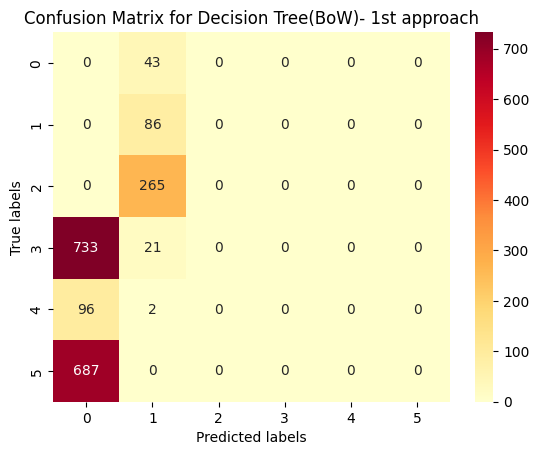

In [75]:
cm = confusion_matrix(Y_test, predBow)

sns.heatmap(cm, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Confusion Matrix for Decision Tree(BoW)- 1st approach')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [76]:
# # Accuracy
# print("Accuracy : ", round(accuracy_score(Y_test, predBow), 3))
# #
# # Precision
# print("Precision : ", round(precision_score(Y_test, predBow, average='weighted'), 3))
# #
# # Recall
# print("Recall : ", round(recall_score(Y_test, predBow, average='weighted'), 3))
# #
# #F1 Score
# print("F1 Score : ", round(f1_score(Y_test, predBow, average='weighted'), 3))
     

In [77]:
#The result shows the model has low accuracy and precision. Therefore this Model is not useful

In [78]:
#We can try using the same model with another Feature extraction method

In [79]:
#Instead of BoW, we can use TF-IDF for feature extraction

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:

tfidf_vect = TfidfVectorizer()
tfidf_count = tfidf_vect.fit_transform(new_data2['lemm_text'])


In [82]:
#Scaling

tfidf_scale = StandardScaler(with_mean=False).fit_transform(tfidf_count)
tfidf_scale

<6442x17986 sparse matrix of type '<class 'numpy.float64'>'
	with 91030 stored elements in Compressed Sparse Row format>

In [83]:
#splitting the data

x = tfidf_count
y = new_data2['label_name']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [84]:
x_train.shape, x_test.shape

((4509, 17986), (1933, 17986))

In [85]:
y_train.shape, y_test.shape

((4509,), (1933,))

In [86]:
#Training the model using Decision Tree


IGClassifier2=DecisionTreeClassifier(criterion='entropy',max_depth=5)
IGClassifier2.fit(x_train,y_train)
IGClassifier2
     

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [87]:
tfidf_test=IGClassifier.predict(x_test)
#predictions
len(tfidf_test)

1933

In [88]:

predTfidf = pd.DataFrame({'Actual' : y_test.values.ravel(), 'Predicted' : tfidf_test})
predTfidf.head()

Actual    Predicted
0      pop_culture  pop_culture
1      pop_culture  pop_culture
2      pop_culture  pop_culture
3  sports_&_gaming  pop_culture
4      pop_culture  pop_culture

In [89]:

# count the number of mismatches
count = 0
for i in range(0, len(predTfidf)):
    if tfidf_test[i] != y_test.values.ravel()[i]:
        count = count + 1
print("Count of Wrong Prediction : " ,count)

Count of Wrong Prediction :  1181


In [90]:
#Converting y_test to an array for confusion Matrix

label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)

In [91]:
#converting predBow to array

predTfidf = np.argmax(predTfidf, axis=1)

In [92]:
print('Classification Report of Decision Tree - 1st approach(TF-IDF)')
print('\n')
print(classification_report(y_test,predTfidf, zero_division = 1))

Classification Report of Decision Tree - 1st approach(TF-IDF)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.23      1.00      0.38        88
           2       1.00      0.00      0.00       235
           3       1.00      0.00      0.00       752
           4       1.00      0.00      0.00        88
           5       1.00      0.00      0.00       717

    accuracy                           0.05      1933
   macro avg       0.71      0.17      0.06      1933
weighted avg       0.94      0.05      0.02      1933



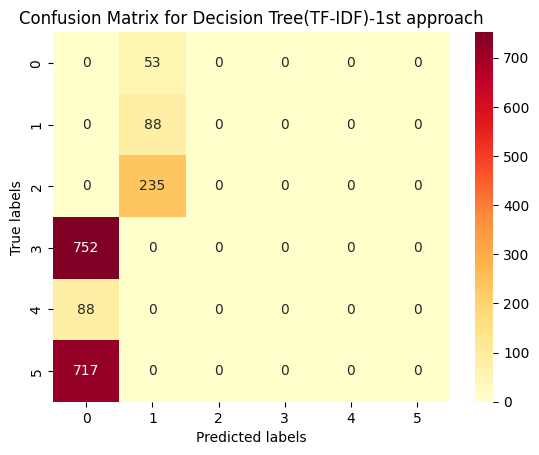

In [93]:
cm2 = confusion_matrix(y_test, predTfidf)

sns.heatmap(cm2, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Confusion Matrix for Decision Tree(TF-IDF)-1st approach')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [94]:
#The results show the model is still poor. 

In [95]:
#We can try Logistic Regression now

In [96]:
lreg = LogisticRegression(max_iter=5000)
lreg.fit(X_train, Y_train)

LogisticRegression(max_iter=5000)

In [97]:
#Prediction

predlog = lreg.predict_proba(X_test)

predint = predlog[:,1] >= 0.3
predint = predint.astype(int)


In [98]:
print('Classification Report of Logistic Regression - 1st approach(BoW)')
print('\n')
print(classification_report(y_test,predint, zero_division = 1))

Classification Report of Logistic Regression - 1st approach(BoW)


              precision    recall  f1-score   support

           0       0.03      0.98      0.05        53
           1       0.03      0.01      0.02        88
           2       1.00      0.00      0.00       235
           3       1.00      0.00      0.00       752
           4       1.00      0.00      0.00        88
           5       1.00      0.00      0.00       717

    accuracy                           0.03      1933
   macro avg       0.68      0.17      0.01      1933
weighted avg       0.93      0.03      0.00      1933



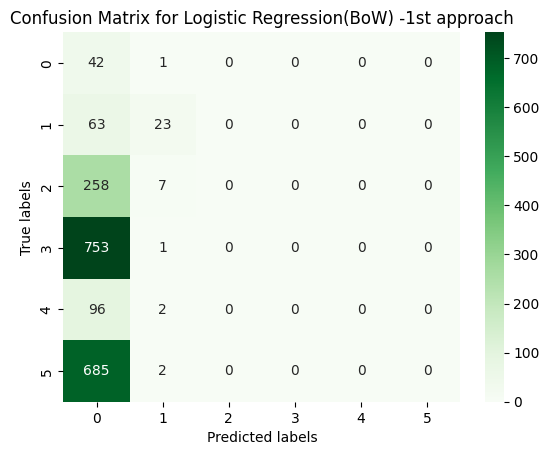

In [99]:
cmint = confusion_matrix(Y_test, predint)

sns.heatmap(cmint, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix for Logistic Regression(BoW) -1st approach')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [100]:
#low f1 scores indicates poor model. 
#Lets try with TD-IDF data

In [101]:
lreg.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [102]:
predlog2 = lreg.predict_proba(x_test)

predint2 = predlog2[:,1] >= 0.3
predint2 = predint2.astype(int)


In [103]:
print('Classification Report of Logistic Regression- 1st approach(TF-IDF)')
print('\n')
print(classification_report(y_test,predint2, zero_division = 1))

Classification Report of Logistic Regression- 1st approach(TF-IDF)


              precision    recall  f1-score   support

           0       0.03      1.00      0.05        53
           1       1.00      0.10      0.19        88
           2       1.00      0.00      0.00       235
           3       1.00      0.00      0.00       752
           4       1.00      0.00      0.00        88
           5       1.00      0.00      0.00       717

    accuracy                           0.03      1933
   macro avg       0.84      0.18      0.04      1933
weighted avg       0.97      0.03      0.01      1933



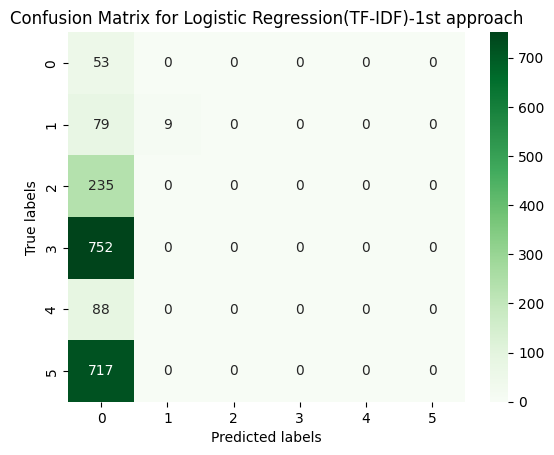

In [104]:
cmint2 = confusion_matrix(y_test, predint2)

sns.heatmap(cmint2, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix for Logistic Regression(TF-IDF)-1st approach')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [105]:
#This also shows low score, hence low performance. However, the f1 score is compartively better than the data extracted usig BoW



In [106]:
#Lets use more advanced methods now

In [107]:
#Naive Bayes Model#

In [108]:
#Using BoW data
#Creating a classifier

naive_classifier = MultinomialNB()

In [109]:
naive_classifier.fit(X_train, Y_train)

MultinomialNB()

In [110]:
#Prediction

naive_pred = naive_classifier.predict(X_test)

In [111]:
Y_test.shape, naive_pred.shape

((1933,), (1933,))

In [209]:
# type(new_data2['label_name'])

pandas.core.series.Series

In [113]:
# Y_test11 = Y_test.astype(int)
# naive_pred11 = naive_pred.astype(int)


In [114]:
#facing issues. This could be solved by using "label" which has integers instead of "label_name" for training model

In [115]:
#using the BoW method to split the dataset again. This time, we are using "label"
X1 = bow_scale
Y1 = new_data2['label']

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.3, stratify=Y, random_state=42)

In [116]:
naive_classifier.fit(X1_train, Y1_train)

MultinomialNB()

In [117]:
#Prediction

naive_pred1 = naive_classifier.predict(X1_test)

In [118]:
#evaluating the model
print("Classification report of Naive Bayes- 1st approach (BoW)")
print("\n")
classification_naive1 = classification_report(Y1_test, naive_pred1)
print(classification_naive1)

Classification report of Naive Bayes- 1st approach (BoW)


              precision    recall  f1-score   support

           0       0.04      0.79      0.08        43
           1       0.28      0.52      0.37        86
           2       0.88      0.32      0.47       754
           3       0.42      0.25      0.32       265
           4       0.88      0.49      0.63       687
           5       0.35      0.59      0.44        98

    accuracy                           0.40      1933
   macro avg       0.48      0.49      0.38      1933
weighted avg       0.75      0.40      0.49      1933



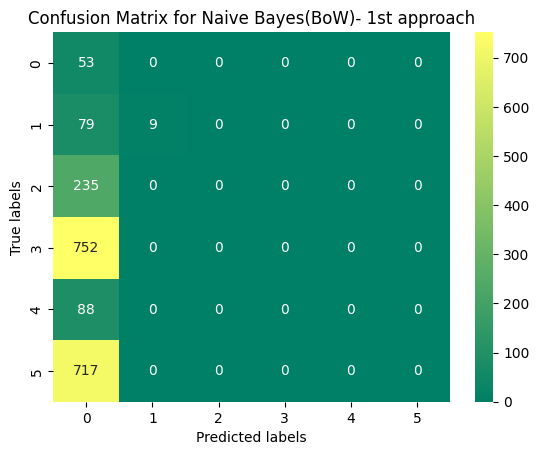

In [119]:
cminaive1 = confusion_matrix(Y1_test, naive_pred1)

sns.heatmap(cmint2, annot=True, cmap='summer', fmt='d')
plt.title('Confusion Matrix for Naive Bayes(BoW)- 1st approach')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [120]:
#Lets split the testing and training data again using TF-IDF


tfidf_vect = TfidfVectorizer()
tfidf_count2 = tfidf_vect.fit_transform(new_data2['lemm_text'])

#Scaling

tfidf_scale2 = StandardScaler(with_mean=False).fit_transform(tfidf_count2)
tfidf_scale2

<6442x17986 sparse matrix of type '<class 'numpy.float64'>'
	with 91030 stored elements in Compressed Sparse Row format>

In [121]:
#splitting the data

x2 = tfidf_count2
y2 = new_data2['label']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3)


In [122]:
naive_classifier2 = MultinomialNB()
naive_classifier2.fit(x2_train, y2_train)


MultinomialNB()

In [123]:
naive_pred2 = naive_classifier2.predict(x2_test)

In [124]:
#evaluating the model
print("Classification report of Naive Bayes - 1st approach(TF-IDF)")
print("\n")
classification_naive2 = classification_report(Y_test, naive_pred2, zero_division=1)
print(classification_naive2)

Classification report of Naive Bayes - 1st approach(TF-IDF)


              precision    recall  f1-score   support

           0       1.00      0.00      0.00        43
           1       1.00      0.00      0.00        86
           2       0.13      0.55      0.21       265
           3       0.56      0.01      0.02       754
           4       0.06      0.52      0.11        98
           5       1.00      0.00      0.00       687

    accuracy                           0.11      1933
   macro avg       0.63      0.18      0.06      1933
weighted avg       0.66      0.11      0.04      1933



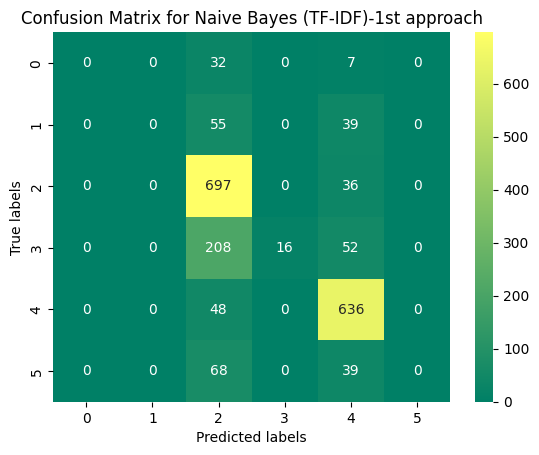

In [125]:
cmnaive2 = confusion_matrix(y2_test, naive_pred2)

sns.heatmap(cmnaive2, annot=True, cmap='summer', fmt='d')
plt.title('Confusion Matrix for Naive Bayes (TF-IDF)-1st approach')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [126]:
#The models are still not showing satisfactory peformance
#Class imbalance and insufficient feature representation could be an issue. 


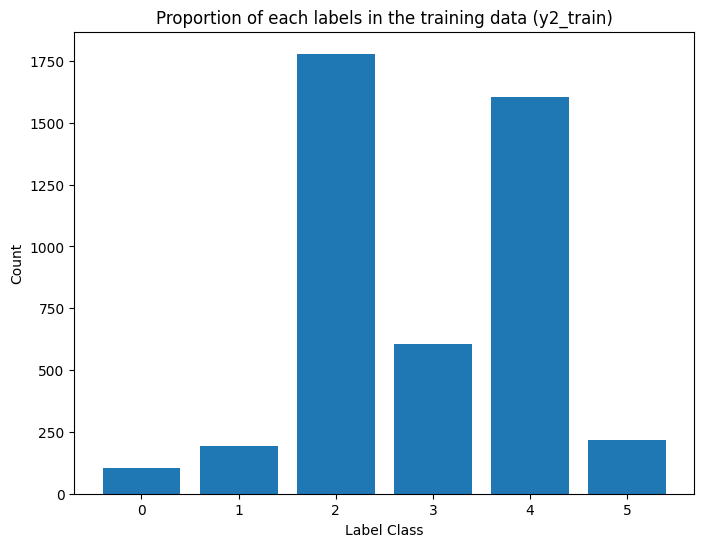

In [127]:
#visualizing the training data to find the balance of the training data

class_counts = np.bincount(y2_train)

class_labels = np.unique(y2_train)

plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Label Class')
plt.ylabel('Count')
plt.title('Proportion of each labels in the training data (y2_train)')
plt.show()


In [128]:
#Using SMOTE to balance the training data

In [129]:
#pip install imbalanced-learn


In [130]:
# from imblearn.over_sampling import SMOTE

# Create the SMOTE oversampler
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
x2_train_balanced, y2_train_balanced = smote.fit_resample(x2_train, y2_train)


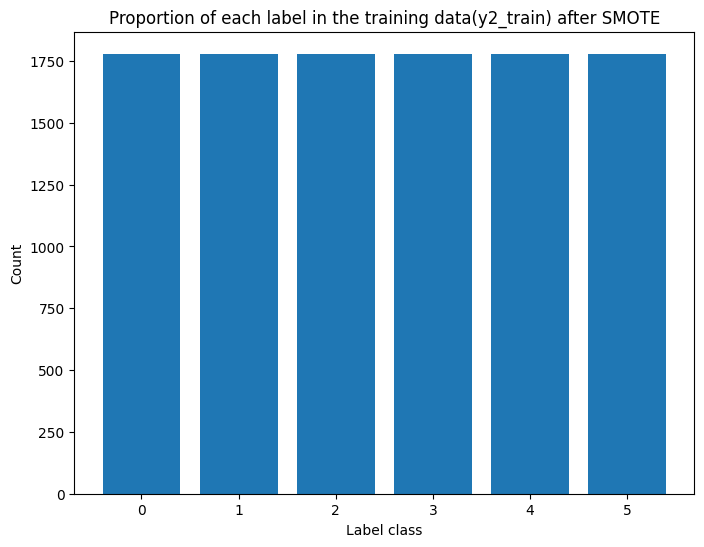

In [131]:
class_counts = np.bincount(y2_train_balanced)

class_labels = np.unique(y2_train_balanced)

#visualizing

plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Label class')
plt.ylabel('Count')
plt.title('Proportion of each label in the training data(y2_train) after SMOTE')
plt.show()

In [132]:
#Applying the Naive Bayes again with the balanced training data

naive_classifier3 = MultinomialNB()
naive_classifier3.fit(x2_train_balanced, y2_train_balanced)


MultinomialNB()

In [133]:
naive_pred3 = naive_classifier3.predict(x2_test)


In [134]:
#evaluating the model
print("Classification report of Naive bayes after SMOTE balancing- 1st approach")
print("\n")
classification_naive3 = classification_report(Y_test, naive_pred3)
print(classification_naive3)

Classification report of Naive bayes after SMOTE balancing- 1st approach


              precision    recall  f1-score   support

           0       0.01      0.02      0.02        43
           1       0.04      0.05      0.04        86
           2       0.13      0.27      0.17       265
           3       0.40      0.20      0.26       754
           4       0.06      0.39      0.10        98
           5       0.29      0.07      0.11       687

    accuracy                           0.16      1933
   macro avg       0.15      0.17      0.12      1933
weighted avg       0.28      0.16      0.17      1933



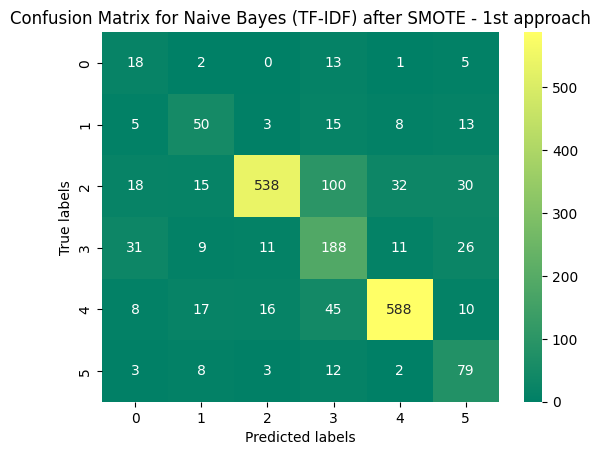

In [135]:
cmnaive3 = confusion_matrix(y2_test, naive_pred3)

sns.heatmap(cmnaive3, annot=True, cmap='summer', fmt='d')
plt.title('Confusion Matrix for Naive Bayes (TF-IDF) after SMOTE - 1st approach')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [136]:
#We can see that the model performs relatively better once the training data is balanced
#We can try the Decision Tree again with the balanced training data

In [137]:
IGClassifier=DecisionTreeClassifier(criterion='entropy',max_depth=5)
IGClassifier.fit(x2_train_balanced,y2_train_balanced)
IGClassifier

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [138]:
dc_test_balanced =IGClassifier.predict(x2_test)
#predictions
len(dc_test_balanced)

1933

In [149]:
preddc_balanced = pd.DataFrame({'Actual' : y2_test.values.ravel(), 'Predicted' : dc_test_balanced})
preddc_balanced.head()

Actual  Predicted
0       3          3
1       3          3
2       5          1
3       4          4
4       4          1

In [150]:
# count the number of mismatches
count = 0
for i in range(0, len(preddc_balanced)):
    if dc_test_balanced[i] != y2_test.values.ravel()[i]:
        count = count + 1
print("Count of Wrong Prediction : " ,count)

Count of Wrong Prediction :  1521


In [151]:
#Converting Y_test to an array for confusion Matrix

label_encoder = LabelEncoder()
y2_test_en = label_encoder.fit_transform(y2_test)

In [152]:
#converting predBow to array

dc_balanced_en = np.argmax(preddc_balanced, axis=1)

In [153]:
# Calculate the confusion matrix
cm = confusion_matrix(y2_test_en, dc_balanced_en)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  1  38   0   0   0   0]
 [ 92   2   0   0   0   0]
 [703  30   0   0   0   0]
 [273   3   0   0   0   0]
 [684   0   0   0   0   0]
 [107   0   0   0   0   0]]


In [154]:
#evaluating the model
print("Classification Report of Decision Tree after SMOTE - 1st approach")
print("\n")
classification_decisiontree = classification_report(y2_test_en, dc_balanced_en, zero_division=1)
print(classification_decisiontree)

Classification Report of Decision Tree after SMOTE - 1st approach


              precision    recall  f1-score   support

           0       0.00      0.03      0.00        39
           1       0.03      0.02      0.02        94
           2       1.00      0.00      0.00       733
           3       1.00      0.00      0.00       276
           4       1.00      0.00      0.00       684
           5       1.00      0.00      0.00       107

    accuracy                           0.00      1933
   macro avg       0.67      0.01      0.00      1933
weighted avg       0.93      0.00      0.00      1933



In [155]:
#The model performance is low even with the balanced training data. 

In [156]:
#################################################################

In [157]:
################################################################

In [158]:
####SECOND APPROACH############

In [159]:
#####Let us approach the vectorization in a different way#####


In [160]:
#Splitting the data into X2 and Y2 

X2 = new_data2['lemm_text']
Y2 = new_data2['label']

seed = 42
test_size = 0.3

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.2, random_state = seed, stratify=new_data2['label'])



In [161]:
print(X2_train.shape, X2_test.shape, Y2_train.shape, Y2_test.shape)

(5153,) (1289,) (5153,) (1289,)


In [162]:
#Using the TF-IDF, we are fitting the training and testing data

vectorizer = TfidfVectorizer()

In [163]:
#fit on the training data
X2_train = vectorizer.fit_transform(X2_train)

#transform the test data
X2_test = vectorizer.transform(X2_test)

In [164]:
X2_train.shape, X2_test.shape

((5153, 15633), (1289, 15633))

In [165]:
clf = LogisticRegression()
clf.fit(X2_train,Y2_train)
train_predictions = clf.predict(X2_train)
test_predictions = clf.predict(X2_test)

In [166]:
print('Accuracy Score on training set %.5f' %accuracy_score(Y2_train,train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(Y2_test,test_predictions))

Accuracy Score on training set 0.89016
Accuracy Score on test set 0.77269


In [167]:
# print('Classification Report Training set')
# print('\n')
# print(classification_report(Y2_train,train_predictions))

In [168]:
print('Classification Report for Logistic Regression (2nd approach-unbalanced)')
print('\n')
print(classification_report(Y2_test,test_predictions, zero_division = 1))

Classification Report for Logistic Regression (2nd approach-unbalanced)


              precision    recall  f1-score   support

           0       1.00      0.00      0.00        29
           1       0.91      0.18      0.29        57
           2       0.72      0.92      0.81       503
           3       0.74      0.48      0.58       177
           4       0.83      0.91      0.87       458
           5       0.96      0.34      0.50        65

    accuracy                           0.77      1289
   macro avg       0.86      0.47      0.51      1289
weighted avg       0.79      0.77      0.74      1289



In [169]:
results_lgst = pd.DataFrame({'Actual': Y2_test, 'Predicted': test_predictions})

print(results_lgst)


      Actual  Predicted
2229       2          4
2572       4          4
4810       4          4
6272       2          2
5645       4          4
...      ...        ...
1103       2          2
2861       2          2
1744       3          3
2232       2          3
2841       2          2

[1289 rows x 2 columns]


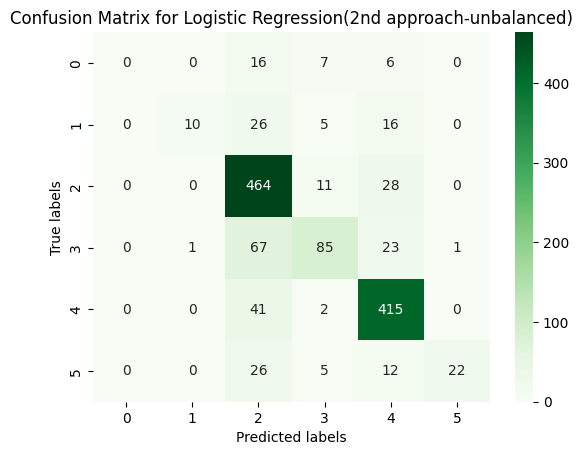

In [170]:
confusion_test = confusion_matrix(Y2_test, test_predictions)

sns.heatmap(confusion_test, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix for Logistic Regression(2nd approach-unbalanced)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [171]:
#This model shows better results as compared to earlier Model.
#We can use this training and testing data to further try out different models. 

In [172]:
#Lets try to use the same test and train data for Naive Bayes now

In [173]:
naive_classifier = MultinomialNB()
naive_classifier.fit(X2_train, Y2_train)

MultinomialNB()

In [174]:
predict_naive = naive_classifier.predict(X2_test)

In [175]:
#evaluating the model
print('Classification Report for Naive Bayes (2nd approach - unbalanced)')
print('\n')
print(classification_report(Y2_test, predict_naive, zero_division=1))


Classification Report for Naive Bayes (2nd approach - unbalanced)


              precision    recall  f1-score   support

           0       1.00      0.00      0.00        29
           1       1.00      0.00      0.00        57
           2       0.65      0.94      0.77       503
           3       1.00      0.06      0.11       177
           4       0.78      0.93      0.85       458
           5       1.00      0.00      0.00        65

    accuracy                           0.71      1289
   macro avg       0.90      0.32      0.29      1289
weighted avg       0.78      0.71      0.62      1289



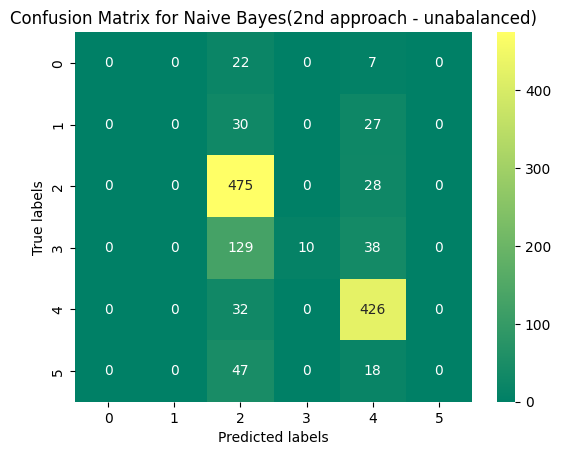

In [176]:
confusion_naive = confusion_matrix(Y2_test, predict_naive)

sns.heatmap(confusion_naive, annot=True, cmap='summer', fmt='d')
plt.title('Confusion Matrix for Naive Bayes(2nd approach - unabalanced)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [177]:
#This model performs better than the previous Naive Bayes model tried.
#This model only perform similar to the logistic regression model above

In [178]:
DCClassifier = DecisionTreeClassifier(criterion='gini',max_depth=5,min_impurity_decrease=0.0)
DCClassifier.fit(X2_train,Y2_train)
DCClassifier

DecisionTreeClassifier(max_depth=5)

In [179]:
decision_test1 =DCClassifier.predict(X2_test)
#predictions
len(decision_test1)

1289

In [180]:
Y2_DC = pd.DataFrame({'Actual': Y2_test.ravel()})
pred_DC = pd.DataFrame({'Actual' : Y2_DC.values.ravel(), 'Predicted' : decision_test1})
pred_DC.head()

Actual  Predicted
0       2          2
1       4          4
2       4          2
3       2          2
4       4          2

In [181]:
# count the number of mismatches
count = 0
for i in range(0, len(pred_DC)):
    if decision_test1[i] != Y2_DC.values.ravel()[i]:
        count = count + 1
print("Count of Wrong Prediction : " ,count)

Count of Wrong Prediction :  653


In [182]:

# label_encoder_DC = LabelEncoder()
# Y2_test_flatDC = Y2_DC.ravel()
# Y2_test_encodedDC = label_encoder_final.fit_transform(Y2_test_flatDC)

# pred_decision1 = np.argmax(pred_decision1, axis=1)


In [183]:
print('Classification Report for Decision tree (2nd approach - unbalanced)')
print('\n')
print(classification_report(Y2_DC,decision_test1, zero_division=1))

Classification Report for Decision tree (2nd approach - unbalanced)


              precision    recall  f1-score   support

           0       1.00      0.00      0.00        29
           1       1.00      0.00      0.00        57
           2       0.44      0.97      0.60       503
           3       0.67      0.19      0.29       177
           4       0.94      0.25      0.39       458
           5       1.00      0.00      0.00        65

    accuracy                           0.49      1289
   macro avg       0.84      0.23      0.21      1289
weighted avg       0.71      0.49      0.42      1289



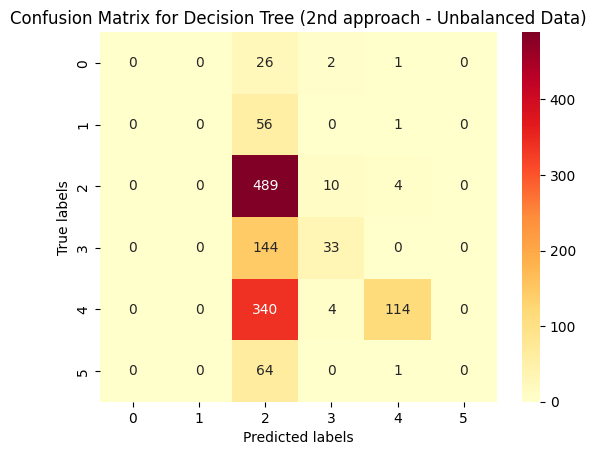

In [184]:
confusion_DC = confusion_matrix(Y2_DC, decision_test1)

sns.heatmap(confusion_DC, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Confusion Matrix for Decision Tree (2nd approach - Unbalanced Data)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [185]:
#However, these test and train data were not balanced. 
#We can try with balanced train and test data

In [186]:
X2_train_balanced, Y2_train_balanced = smote.fit_resample(X2_train, Y2_train)


In [187]:
naive_classifier_balanced = MultinomialNB()
naive_classifier_balanced.fit(X2_train_balanced, Y2_train_balanced)

MultinomialNB()

In [188]:
predict_naive_balanced = naive_classifier_balanced.predict(X2_test)

In [189]:
#evaluating the model
print('Classification Report for Naive Bayes with balanced -2nd approach')
print('\n')
print(classification_report(Y2_test, predict_naive_balanced, zero_division=1))


Classification Report for Naive Bayes with balanced -2nd approach


              precision    recall  f1-score   support

           0       0.33      0.45      0.38        29
           1       0.41      0.58      0.48        57
           2       0.90      0.77      0.83       503
           3       0.52      0.61      0.56       177
           4       0.92      0.88      0.90       458
           5       0.48      0.75      0.58        65

    accuracy                           0.77      1289
   macro avg       0.59      0.67      0.62      1289
weighted avg       0.80      0.77      0.78      1289



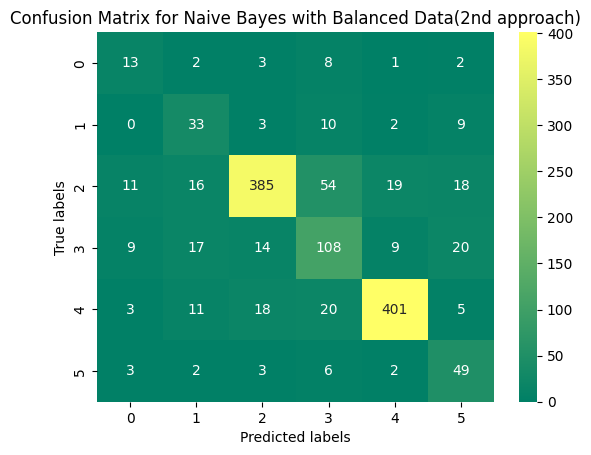

In [190]:
confusion_naive_balanced = confusion_matrix(Y2_test, predict_naive_balanced)

sns.heatmap(confusion_naive_balanced, annot=True, cmap='summer', fmt='d')
plt.title('Confusion Matrix for Naive Bayes with Balanced Data(2nd approach)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [191]:
#We can see that the model has significantly improved once the training data is balanced. 


In [192]:
#Using the balanced data for Logistic Regression Model

In [193]:
clf_balanced = LogisticRegression(max_iter=5000)
clf_balanced.fit(X2_train_balanced,Y2_train_balanced)
train_predictions_balanced = clf_balanced.predict(X2_train_balanced)
test_predictions_balanced = clf_balanced.predict(X2_test)

In [194]:
#This can be solved by scaling the data

In [195]:
# scaler = StandardScaler()
# X2_train_scaled = scaler.fit_transform(X2_train_balanced)
# X2_test_scaled = scaler.transform(X2_test)


In [196]:
#StandardScaler does not work with sparse matrix
#Here we can use MaxAbsScaler

In [197]:
scaler = MaxAbsScaler()
X2_train_scaled = scaler.fit_transform(X2_train_balanced)
X2_test_scaled = scaler.transform(X2_test)

In [198]:
clf_balanced = LogisticRegression(max_iter=5000)
clf_balanced.fit(X2_train_scaled,Y2_train_balanced)
train_predictions_balanced = clf_balanced.predict(X2_train_scaled)
test_predictions_balanced = clf_balanced.predict(X2_test_scaled)

In [199]:
print('Accuracy Score on training set %.5f' %accuracy_score(Y2_train_balanced,train_predictions_balanced))
print('Accuracy Score on test set %.5f' %accuracy_score(Y2_test,test_predictions_balanced))

Accuracy Score on training set 0.99950
Accuracy Score on test set 0.79752


In [200]:
print('Classification Report for Logistic Regression with balanced - 2nd approach')
print('\n')
print(classification_report(Y2_test,test_predictions_balanced, zero_division = 1))

Classification Report for Logistic Regression with balanced - 2nd approach


              precision    recall  f1-score   support

           0       0.36      0.14      0.20        29
           1       0.65      0.53      0.58        57
           2       0.81      0.88      0.85       503
           3       0.59      0.58      0.58       177
           4       0.89      0.88      0.89       458
           5       0.73      0.68      0.70        65

    accuracy                           0.80      1289
   macro avg       0.67      0.61      0.63      1289
weighted avg       0.79      0.80      0.79      1289



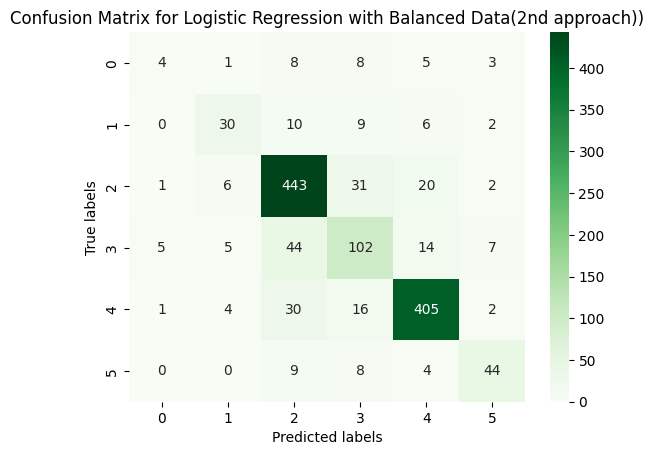

In [201]:
confusion_test_balanced = confusion_matrix(Y2_test, test_predictions_balanced)

sns.heatmap(confusion_test_balanced, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix for Logistic Regression with Balanced Data(2nd approach))')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [202]:
#Now we can try the decision tree algorithm with balanced data

In [203]:
IGClassifier2 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_impurity_decrease=0.0)
IGClassifier2.fit(X2_train_balanced,Y2_train_balanced)
IGClassifier2

DecisionTreeClassifier(max_depth=5)

In [204]:
decision_test =IGClassifier2.predict(X2_test)
#predictions
len(decision_test)

1289

In [205]:
Y2_test2 = pd.DataFrame({'Actual': Y2_test.ravel()})
pred_decision = pd.DataFrame({'Actual' : Y2_test2.values.ravel(), 'Predicted' : decision_test})
pred_decision.head()

Actual  Predicted
0       2          1
1       4          4
2       4          1
3       2          1
4       4          1

In [206]:
# count the number of mismatches
count = 0
for i in range(0, len(pred_decision)):
    if decision_test[i] != Y2_test2.values.ravel()[i]:
        count = count + 1
print("Count of Wrong Prediction : " ,count)

Count of Wrong Prediction :  1013


In [1]:

# label_encoder_final = LabelEncoder()
# Y2_test_flattened = Y2_test2.ravel()
# Y2_test_encoded = label_encoder_final.fit_transform(Y2_test_flattened)

# pred_decision = np.argmax(pred_decision, axis=1)


In [2]:
print('Classification Report of decision tree with balanced - 2nd approach')
print('\n')
print(classification_report(Y2_test_encoded,pred_decision, zero_division=1))

Classification Report of decision tree with balanced - 2nd approach




NameError: name 'classification_report' is not defined

In [ ]:
confusion_decision2 = confusion_matrix(Y2_test_encoded, pred_decision)

sns.heatmap(confusion_decision2, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Confusion Matrix for Decision Tree (2nd approach - Balanced Data)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
#Decision Tree model still seems to get low performance

In [ ]:
###############################

In [ ]:
#########END##########